In [25]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [26]:
nodes = ['a', 'b', 'c', 'd', 'e']

adj = { 'a' : ['b'],
        'b' : ['c', 'd'],
        'c' : ['e']}

DG = nx.DiGraph()
DG.add_nodes_from([(x, {"color": "w"}) for x in nodes])
DG.add_edges_from([(k, val) for k, vals in adj.items() for val in vals])

# print all nodes and their colors
print([(x, DG.nodes[x]['color']) for x in DG.nodes])

# print all successors and their color for a specific node
print([(x, DG.nodes[x]['color']) for x in list(DG.successors('a'))])


[('a', 'w'), ('b', 'w'), ('c', 'w'), ('d', 'w'), ('e', 'w')]
[('b', 'w')]


In [27]:
options = {
    "font_size": 20,
    "node_size": 1000,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 3,
    "width": 3,
}

depth_list = {'a': 0,
         'b': 1,
         'c': 2,
         'd': 2,
         'e': 3}


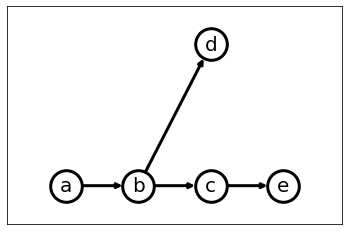

In [28]:
# PRINT TOPSORT
pos = {}
max_depth = max(depth_list.values())

for i in range(max_depth + 1):
    current_nodes = [x for x in depth_list if depth_list[x] == i]
    pos.update({node: (i, index + 0.5) for index, node in enumerate(current_nodes)})

nx.draw_networkx(DG, pos, **options)
ax = plt.gca()
ax.margins(0.20)
#plt.axis("off")
plt.show()

In [82]:
test = nx.DiGraph()
l = [['1','2'],['1','3'],['1','4'],['1','5'],['1','6'],['2','7'],['2','8'],['2','9'],['3','10'],['3','11']]
test.add_edges_from(l)

test.add_nodes_from([(x, {"color": "w"}) for x in test.nodes])

test.nodes['1']['color'] = 'b'
test.nodes['2']['color'] = 'g'
test.nodes['3']['color'] = 'g'

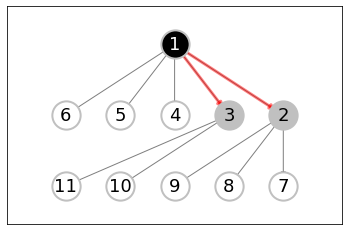

In [99]:
def print_graph(G, active_edges):
    options = {
    "node_size": 800,
    "edgecolors": "silver",
    "linewidths": 2,
    "alpha": 1
    }

    # topological order
    for i, layer in enumerate(nx.topological_generations(G)):
        for n in layer:
            G.nodes[n]["layer"] = i
    pos = nx.multipartite_layout(G, subset_key="layer", align="horizontal")
    # Flip the layout so the root node is on top
    for k in pos:
        pos[k][-1] *= -1

    
    nx.draw_networkx_nodes(G, pos, nodelist=[x for x in test.nodes if test.nodes[x]["color"]=='g'], node_color="silver", **options)
    nx.draw_networkx_nodes(G, pos, nodelist=[x for x in test.nodes if test.nodes[x]["color"]=='b'], node_color="black", **options)
    nx.draw_networkx_nodes(G, pos, nodelist=[x for x in test.nodes if test.nodes[x]["color"]=='w'], node_color="white", **options)

    nx.draw_networkx_edges(G, pos, width=1, alpha=0.5, edge_color="black")
    nx.draw_networkx_edges(G, pos, edgelist=active_edges, width=3, alpha=0.5, edge_color="red")

    nx.draw_networkx_labels(G, pos, {x: x for x in test.nodes if test.nodes[x]["color"]=='b'}, font_size=18, font_color="white")
    nx.draw_networkx_labels(G, pos, {x: x for x in test.nodes if test.nodes[x]["color"]!='b'}, font_size=18, font_color="black")

    ax = plt.gca()
    ax.margins(0.20)
    plt.show()

active_edges = [('1','2'), ('1','3')]
print_graph(test, active_edges)